In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Datasets
path = "./datasets/accepted_2007_to_2018Q4.csv"
dataset_accept = pd.read_csv(path)

/var/folders/v0/9xd212bx5wq454d4gnddf1rm0000gn/T/ipykernel_89477/4056628032.py:3: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_accept = pd.read_csv(path)


In [59]:
limitPer = len(dataset_accept) * .70
dataset = dataset_accept.dropna(thresh=limitPer, axis=1)


In [60]:
dataset["loan_status"].value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

In [61]:
dataset = dataset[(dataset["loan_status"] == "Fully Paid") | (dataset["loan_status"] == "Charged Off")]
dataset.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'a

In [62]:
#Top 5 columns with highest count of 0 rows
dataset[dataset == 0].count(axis=0).sort_values(ascending = False).head(5)

out_prncp                   1345310
out_prncp_inv               1345310
delinq_amnt                 1340311
acc_now_delinq              1338972
chargeoff_within_12_mths    1334414
dtype: int64

In [63]:
#remove rows with more than 70% of 0 values
dataset = dataset.loc[:, 0.7 > (dataset==0).mean()]

In [64]:
#drop columns unnecessary for the model
dataset = dataset.drop(["id","url"], axis = 1)

In [65]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif_data = pd.DataFrame() 
# vif_data["feature"] = dataset.columns 
  
# # calculating VIF for each feature 
# vif_data["VIF"] = [variance_inflation_factor(dataset.values, i) 
#                           for i in range(len(dataset.columns))] 

In [66]:
dataset["term_in_months"] = dataset["term"].str.extract('(\d+)')
dataset["emp_length_in_years"] = dataset["emp_length"].str.extract('(\d+)')

In [67]:
dataset = dataset.drop(["term", "emp_length"], axis = 1)

In [58]:
#'loan_amnt', 'funded_amnt', and 'funded_amnt_inv' have high correlation, so I dropped the other two to avoid multicollinearity

In [115]:
features_to_use = ["loan_status","loan_amnt","int_rate", "grade"
, "home_ownership", "annual_inc", "verification_status", "fico_range_high", "purpose", "pymnt_plan", "term_in_months", "revol_bal"]

In [116]:
features_selected_dataset = dataset.loc[:, features_to_use]

In [117]:
features_selected_dataset.isna().sum()

loan_status            0
loan_amnt              0
int_rate               0
grade                  0
home_ownership         0
annual_inc             0
verification_status    0
fico_range_high        0
purpose                0
pymnt_plan             0
term_in_months         0
revol_bal              0
dtype: int64

<Axes: >

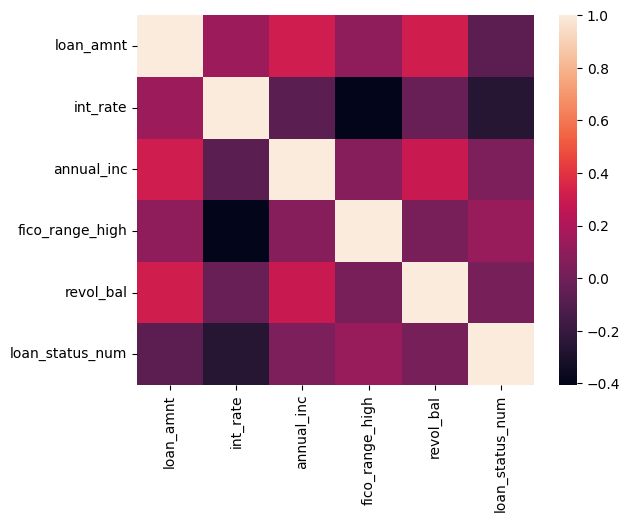

In [118]:
#correlation only takes numeric data
numeric_data = features_selected_dataset.select_dtypes(include='number')
#add a numeric category of loan status where 1 if 'Fully Paid' and 0 if 'Charged Off'
numeric_data['loan_status_num'] = features_selected_dataset['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})
data_corr = numeric_data.corr()
sns.heatmap(data_corr)

<Axes: >

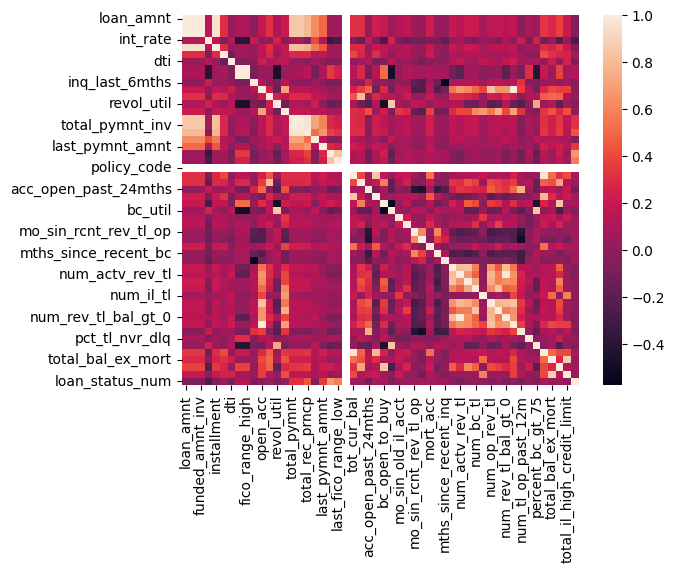

In [119]:
#correlation only takes numeric data
numeric_data = dataset.select_dtypes(include='number')
#add a numeric category of loan status where 1 if 'Fully Paid' and 0 if 'Charged Off'
numeric_data['loan_status_num'] = dataset['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})
data_corr = numeric_data.corr()
sns.heatmap(data_corr)

<Axes: >

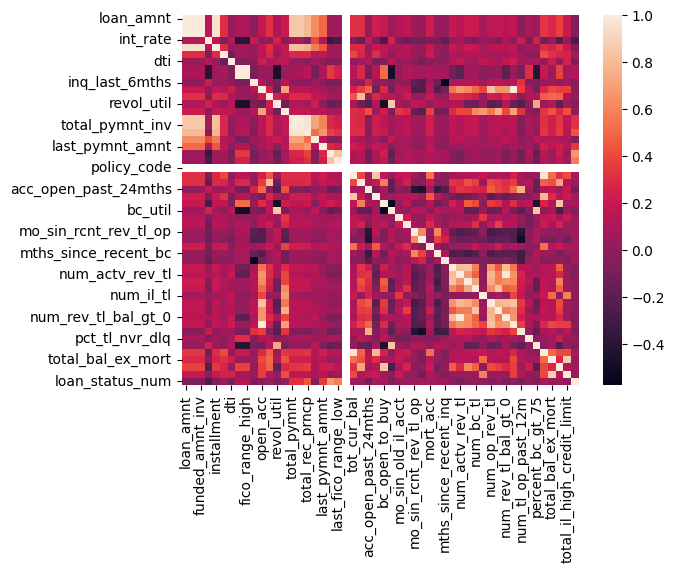

In [120]:
#correlation only takes numeric data
numeric_data = dataset.select_dtypes(include='number')
#add a numeric category of loan status where 1 if 'Fully Paid' and 0 if 'Charged Off'
numeric_data['loan_status_num'] = dataset['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})
data_corr = numeric_data.corr()
sns.heatmap(data_corr)

In [121]:
#Columns with highest correlation to loan_status 
data_corr['loan_status_num'].sort_values(ascending = False).head(15)

loan_status_num         1.000000
last_fico_range_high    0.667842
last_fico_range_low     0.575706
total_rec_prncp         0.438944
last_pymnt_amnt         0.347385
total_pymnt             0.315180
total_pymnt_inv         0.314751
fico_range_low          0.130683
fico_range_high         0.130682
bc_open_to_buy          0.082044
avg_cur_bal             0.078924
tot_hi_cred_lim         0.078473
mort_acc                0.075294
total_bc_limit          0.072171
tot_cur_bal             0.071206
Name: loan_status_num, dtype: float64

In [122]:
#One Hot Encoding Categorical Variables 
features_selected_dataset["loan_status"] = features_selected_dataset['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})
# features_selected_dataset = pd.get_dummies(features_selected_dataset, drop_first=True)

In [130]:
def split_dataset(dataset, test_ratio=0.30):
  """Splits df into train and test set."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

In [127]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

In [132]:
train_ds_pd, test_ds_pd = split_dataset(features_selected_dataset)
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label="loan_status")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label="loan_status")

In [134]:
#RandomForestModel
model1 = tfdf.keras.RandomForestModel(verbose=2)
model1.fit(train_ds)

Use 8 thread(s) for training
Use /var/folders/v0/9xd212bx5wq454d4gnddf1rm0000gn/T/tmp26m18uts as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'loan_amnt': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'int_rate': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'grade': <tf.Tensor 'data_2:0' shape=(None,) dtype=string>, 'home_ownership': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'annual_inc': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'verification_status': <tf.Tensor 'data_5:0' shape=(None,) dtype=string>, 'fico_range_high': <tf.Tensor 'data_6:0' shape=(None,) dtype=float64>, 'purpose': <tf.Tensor 'data_7:0' shape=(None,) dtype=string>, 'pymnt_plan': <tf.Tensor 'data_8:0' shape=(None,) dtype=string>, 'term_in_months': <tf.Tensor 'data_9:0' shape=(None,) dtype=string>, 'revol_bal': <tf.Tensor 'data_10:0' shape=(None,) dtype=float64>}
Label: Tensor("data_11:0", shape=(None,), dtype=int64)
Weights: None
Normalized 

[INFO 23-11-04 16:24:01.5476 PDT kernel.cc:773] Start Yggdrasil model training
[INFO 23-11-04 16:24:01.5519 PDT kernel.cc:774] Collect training examples
[INFO 23-11-04 16:24:01.5519 PDT kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-11-04 16:24:01.5555 PDT kernel.cc:393] Number of batches: 942
[INFO 23-11-04 16:24:01.5555 PDT kernel.cc:394] Number of examples: 941544
[INFO 23-11-04 16:24:01.8128 PDT kernel.cc:794] Training dataset:
Number of records: 941544
Number of columns: 12

Number of columns by type:
	CATEGORICAL: 7 (58.3333%)
	NUMERICAL: 5 (41.6667%)

Columns:

CATEGORICAL: 7 (58.3333%)
	0: "__LABEL" CATEGORICAL integerized vocab-size:3

Model trained in 0:02:18.237494
Compiling model...
Model compiled.


In [136]:
model1.compile(metrics=["accuracy"])
evaluation = model1.evaluate(test_ds, return_dict=True)

404/404 [==============================] - 33s 81ms/step - loss: 0.0000e+00 - accuracy: 0.8024


In [138]:
model1.make_inspector().evaluation()

Evaluation(num_examples=941544, accuracy=0.8026709320010535, loss=2.280634620353419, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [140]:
model1.make_inspector().variable_importances()

{'INV_MEAN_MIN_DEPTH': [("grade" (4; #3), 0.38494235380720365),
  ("int_rate" (1; #5), 0.2271334979309797),
  ("term_in_months" (4; #10), 0.20056766352567953),
  ("home_ownership" (4; #4), 0.15914380199941536),
  ("annual_inc" (1; #1), 0.1395730797434748),
  ("fico_range_high" (1; #2), 0.12815330458825855),
  ("loan_amnt" (1; #6), 0.11623683105101379),
  ("purpose" (4; #7), 0.09309970233742805),
  ("revol_bal" (1; #9), 0.09214231205007359),
  ("verification_status" (4; #11), 0.08479666146275992)],
 'SUM_SCORE': [("grade" (4; #3), 5993608.707644716),
  ("int_rate" (1; #5), 4701096.407817534),
  ("revol_bal" (1; #9), 3076308.2110291934),
  ("annual_inc" (1; #1), 2584076.7328117853),
  ("loan_amnt" (1; #6), 2251758.5672531365),
  ("fico_range_high" (1; #2), 1667874.3081923549),
  ("purpose" (4; #7), 1526851.3605818115),
  ("term_in_months" (4; #10), 1446659.0702099588),
  ("home_ownership" (4; #4), 707184.8073363358),
  ("verification_status" (4; #11), 519553.42061022454)],
 'NUM_AS_ROOT'